## EDA: Basic Exploratory Data Analysis
https://www.analyticsvidhya.com/blog/2021/02/introduction-to-exploratory-data-analysis-eda/  
https://www.epa.gov/caddis-vol4/exploratory-data-analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
# pd.set_option('max_columns', None)  # show all columns
from sklearn.preprocessing import OneHotEncoder
#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

In [4]:
df = pd.read_excel('../../DATAJAVI_V2_men.xlsx')
df_2 = pd.read_excel('../../DATAJAVI_V2_men.xlsx')  # to make changes

In [5]:
df.columns

Index(['ShotID', 'Sexo', 'EventID', 'startScore_Server', 'startScore_Receiver',
       'shotCount', '1º o 2º saque', 'serve_class', 'result', 'E<=1', 'E<=2',
       'E<=4', 'E>4', 'Efectividad', 'Lado(1:Iguales;0:Ventaja)',
       'DIRECCIÓN:1 abierto;2 al cuerpo;3 a la T', 'V(km/h)', '[YA]', 'ZA',
       'Znet', 'TIME', 'difV', '&(deg)', 'ANG. IN', 'dLinea'],
      dtype='object')

In [6]:
# sorted(list(df.ShotID.values))
# df.ShotID.value_counts().unique()  ### not a single value is repeated. This is an incremental key_id from DBs heritage

In [7]:
### eliminar variable Sexo y ShotID 
# 1. --> todo hombres --> Esta variable no aporta info alguna para el entrenamiento ML
# 2. Tampoco aporta info un ID incremental
columns_to_delete = ['Sexo', 'ShotID', 'EventID', 'startScore_Server', 'startScore_Receiver', 'shotCount', 
                     'serve_class', 'result', 'E<=1', 'E<=2', 'E<=4', 'E>4']
df.drop(columns=columns_to_delete, inplace=True)
df_2.drop(columns=columns_to_delete, inplace=True)

In [8]:
df.Efectividad.describe()

count    20454.000000
mean         3.032316
std          1.011730
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          4.000000
Name: Efectividad, dtype: float64

In [9]:
df_2.describe().loc['std'].sort_values(ascending=False)

V(km/h)                                     19.411117
&(deg)                                       4.859932
ANG. IN                                      2.682266
difV                                         1.610355
Efectividad                                  1.011730
DIRECCIÓN:1 abierto;2 al cuerpo;3 a la T     0.821516
[YA]                                         0.672477
dLinea                                       0.566494
Lado(1:Iguales;0:Ventaja)                    0.499513
1º o 2º saque                                0.461844
ZA                                           0.151205
Znet                                         0.116511
TIME                                         0.052495
Name: std, dtype: float64

In [10]:
df_2.columns

Index(['1º o 2º saque', 'Efectividad', 'Lado(1:Iguales;0:Ventaja)',
       'DIRECCIÓN:1 abierto;2 al cuerpo;3 a la T', 'V(km/h)', '[YA]', 'ZA',
       'Znet', 'TIME', 'difV', '&(deg)', 'ANG. IN', 'dLinea'],
      dtype='object')

In [11]:
### successful preprocessing steps:
df.loc[(df['1º o 2º saque'] == 2), '1º o 2º saque'] = 0  # pasa a binario [1,0]
df_2.loc[(df_2['1º o 2º saque'] == 2), '1º o 2º saque'] = 0  # pasa a binario [1,0]

In [30]:
df.head()

,1º o 2º saque,Efectividad,Lado(1:Iguales;0:Ventaja),DIRECCIÓN:1 abierto;2 al cuerpo;3 a la T,V(km/h),[YA],ZA,Znet,TIME,difV,&(deg),ANG. IN,dLinea
0,1,2,1,2,149.292,2.286,3.174,1.149,0.474,8.409960,4.469013,13.350081,1.751
1,1,3,0,1,183.276,0.871,2.886,1.179,0.420,9.380318,5.210301,9.329834,0.491
2,1,2,1,2,150.732,1.964,2.912,1.284,0.503,7.920631,3.775683,12.681232,1.435
3,0,2,0,1,126.792,0.817,3.030,1.525,0.606,8.186052,3.124373,9.846737,1.143
4,1,3,1,2,141.372,1.088,2.904,1.239,0.504,8.064863,3.428793,12.756220,1.504


In [13]:
df.describe()

,1º o 2º saque,Efectividad,Lado(1:Iguales;0:Ventaja),DIRECCIÓN:1 abierto;2 al cuerpo;3 a la T,V(km/h),[YA],ZA,Znet,TIME,difV,&(deg),ANG. IN,dLinea
count,20454.000000,20454.000000,20454.000000,20454.000000,20454.000000,20454.000000,20454.000000,20454.000000,20454.000000,20454.000000,20454.000000,20454.000000,20454.000000
mean,0.691601,3.032316,0.522343,2.070451,174.440181,1.762130,2.867122,1.149802,0.423751,8.692615,5.379175,11.423949,1.042840
std,0.461844,1.011730,0.499513,0.821516,19.411117,0.672477,0.151205,0.116511,0.052495,1.610355,4.859932,2.682266,0.566494
min,0.000000,1.000000,0.000000,1.000000,73.296000,0.005000,2.078000,0.937000,0.242000,-17.917227,0.033120,6.427432,0.000000
25%,0.000000,2.000000,0.000000,1.000000,160.596000,1.314250,2.780000,1.061000,0.384000,7.997143,2.603517,9.590657,0.574000
50%,1.000000,3.000000,1.000000,2.000000,176.184000,1.782000,2.851000,1.138000,0.416000,8.610471,4.360558,10.226733,1.003000
75%,1.000000,4.000000,1.000000,3.000000,189.036000,2.230000,2.936000,1.221000,0.458000,9.267095,5.980106,12.777876,1.529000
max,1.000000,4.000000,1.000000,3.000000,236.268000,4.714000,4.435000,2.281000,0.655000,35.427279,28.288601,26.452045,2.057000


# AQUI

In [14]:
### Estoy aquí ... algo perdido ... intentando entender qué variables han desdoblado para no meterlas de nuevo.
### Tambien intentando entender cuáles me dijeron que no hacían falta

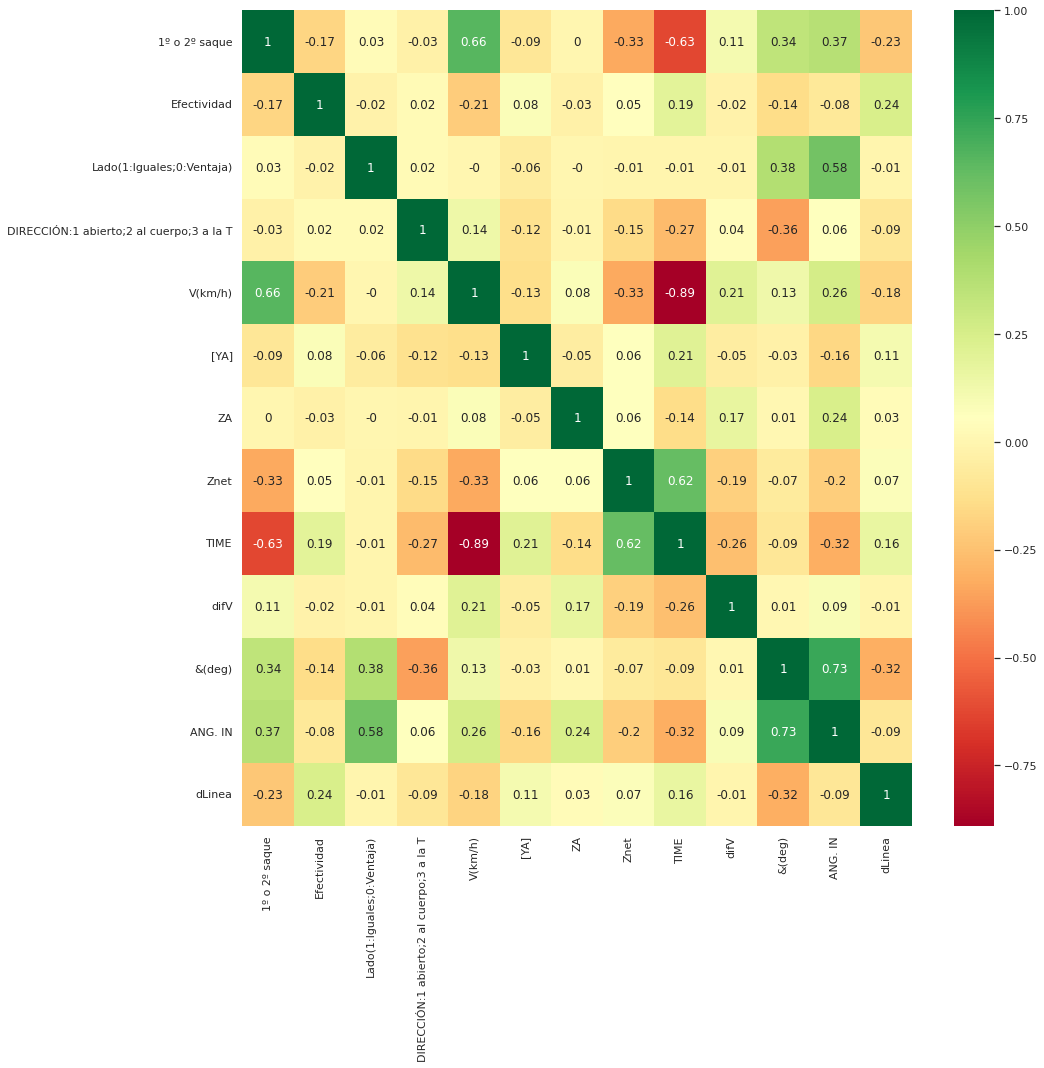

In [17]:
### Plot Correlation Matrix
sn.set(rc={"figure.figsize":(15, 15)})
sn.heatmap(df.corr().round(decimals=2), annot=True, cmap='RdYlGn') # annot=True ,
plt.savefig('/home/javier/mis_proyectos/correlation.png')

This looks much better ... no correlation = 1, which means they have the same info (var 1 is a linear transformation of var 2)

In [42]:
### outliers filter:
cols = [...]
cols

[Ellipsis]

In [22]:
df_3 = df_2.copy()
df_3.drop(columns='V(km/h)', inplace=True)
df_3.columns


Index(['1º o 2º saque', 'Efectividad', 'Lado(1:Iguales;0:Ventaja)',
       'DIRECCIÓN:1 abierto;2 al cuerpo;3 a la T', '[YA]', 'ZA', 'Znet',
       'TIME', 'difV', '&(deg)', 'ANG. IN', 'dLinea'],
      dtype='object')

<AxesSubplot:>

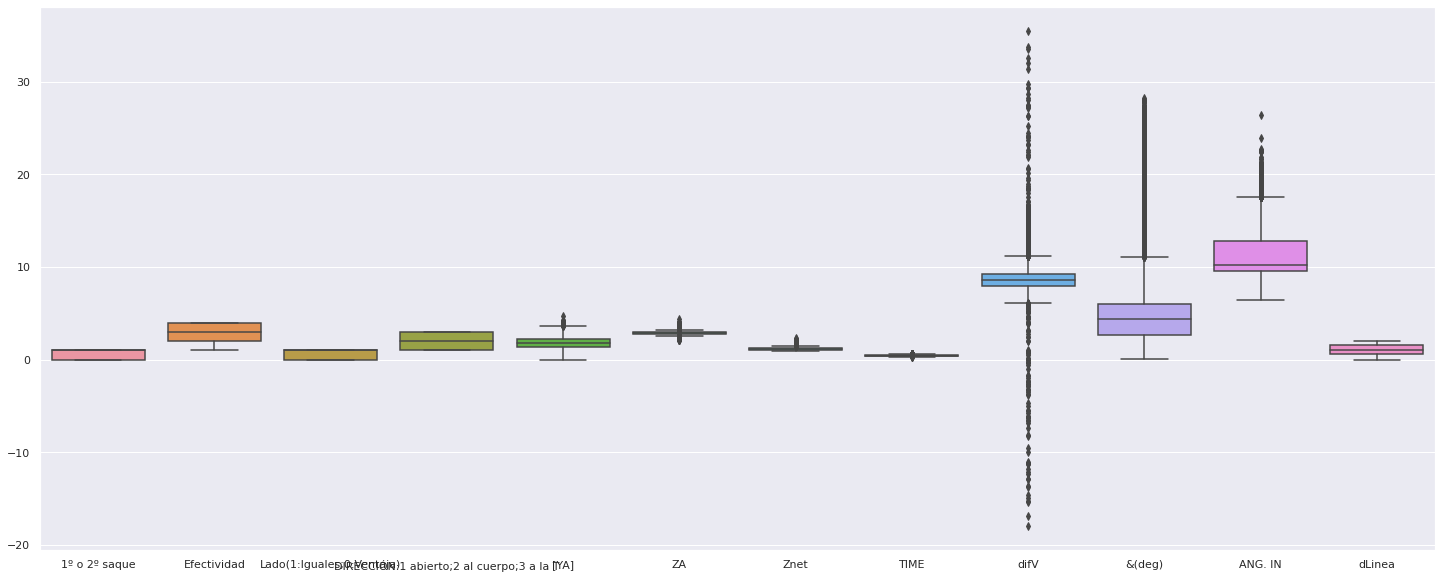

In [23]:
fig_dims = (25, 10)
fig = plt.subplots(figsize=fig_dims)
sn.boxplot(data=df_3)

<AxesSubplot:>

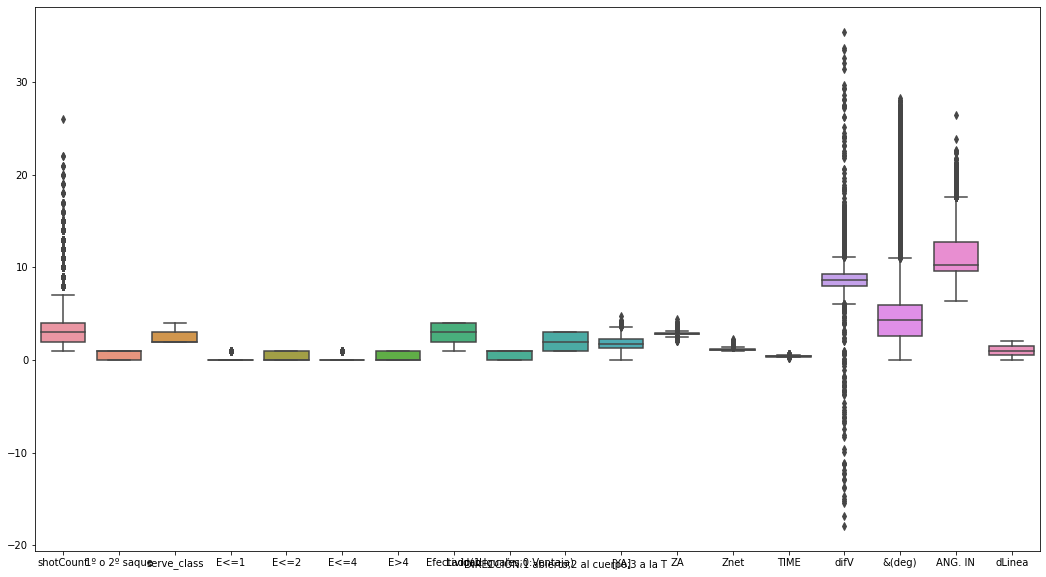

In [56]:
fig_dims = (18, 10)
fig = plt.subplots(figsize=fig_dims)
sn.boxplot(data=df_clean)

In [24]:
df.corr(method='pearson').Efectividad.sort_values(ascending=False)

Efectividad                                 1.000000
dLinea                                      0.244283
TIME                                        0.194283
[YA]                                        0.076397
Znet                                        0.052546
DIRECCIÓN:1 abierto;2 al cuerpo;3 a la T    0.018908
Lado(1:Iguales;0:Ventaja)                  -0.015022
difV                                       -0.019550
ZA                                         -0.033600
ANG. IN                                    -0.081613
&(deg)                                     -0.137573
1º o 2º saque                              -0.169003
V(km/h)                                    -0.212049
Name: Efectividad, dtype: float64

Preprocesamiento:
1. apuntar vars con outliers y dónde (arriba o abajo?) --> realizar filtrado de estas.
2. apuntar qué variables son continuas y cuales discretas.
3. Escalar 1-0s las variables continuas (filtradas de outliers!) --> necesitamos guardar los parámetros de transformación para retransformar luego! Hay que pensar que si vamos a utilizar xAI igual esto no funciona, salvo que podamos retransformar las variables después de predecir las recomendaciones!
4. visualizar distribuciónes de población
5. visualizar correlaciones


array([[<AxesSubplot:title={'center':'Efectividad'}>]], dtype=object)

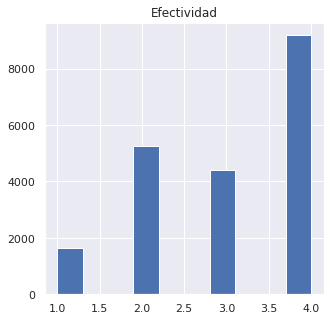

In [29]:
df[['Efectividad']].sort_values(by='Efectividad').hist(figsize = (5,5))

# I am here!

Develop method to apply one-hot encode and ordinal encode to all columns we decide  
Pass a list with one hot and another one with ordinal

In [5]:
# #perform one-hot encoding on 'team' column 
# df_4 = df_3[['serve_class']]
# encoder_df = pd.DataFrame(encoder.fit_transform(df_4[['serve_class']]).toarray())
# 
# #merge one-hot encoded columns back with original DataFrame
# final_df = df_4.join(encoder_df)
# 
# #view final df
# print(final_df)
# final_df
# ### do this to rename columns
# encoder_df.columns = encoder.categories_
# encoder_df

In [6]:
def one_hot(df, cols_list):
    """
    cols_list=['service', 'gender', ...]
    """
    #perform one-hot encoding on 'team' column 
    df = df[['serve_class']]
    encoder_df = pd.DataFrame(encoder.fit_transform(df[['serve_class']]).toarray())
    
    #merge one-hot encoded columns back with original DataFrame
    df = df.join(encoder_df)
    
    #view final df
    # print(df)
    ### do this to rename columns
    encoder_df.columns = encoder.categories_
    return encoder_df


    
def ordinal(df, col_name, order_dicto):
    """
    This is more difficult, since we need to decide the order!
    So we will pass the column in df, the df and the order we need as a dicto.
    Example:
        order_dicto = {'first service':1, 'second service': 2, ...}
    """
    ...
    
encoder_df = one_hot(df, ['serve_class'])
encoder_df

,ACE,FAULT,NOT RETURNED,RETURNED
0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0
...,...,...,...,...
29188,0.0,0.0,1.0,0.0
29189,0.0,1.0,0.0,0.0
29190,0.0,0.0,0.0,1.0
29191,0.0,1.0,0.0,0.0


### Apply one hot to all:
In the future think about applying other alternatives like generating ordinal classes (better when possible, 
but not so easy to automate to all discrete classess successfully... human decision is required)

In [79]:
df['1º o 2º saque'].unique()

array([1, 0])

In [80]:
df['serve_class']

0        3
1        2
2        3
3        1
4        2
        ..
29188    3
29189    1
29190    2
29191    1
29192    2
Name: serve_class, Length: 29193, dtype: int64

array([[<AxesSubplot:title={'center':'Efectividad'}>,
        <AxesSubplot:title={'center':'serve_class'}>]], dtype=object)

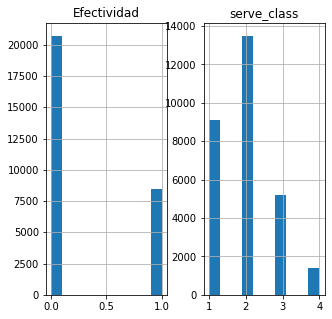

In [30]:
df[['Efectividad','serve_class']].sort_values(by='Efectividad').hist(figsize = (5,5))

array([[<AxesSubplot:title={'center':'Efectividad'}>,
        <AxesSubplot:title={'center':'serve_class'}>]], dtype=object)

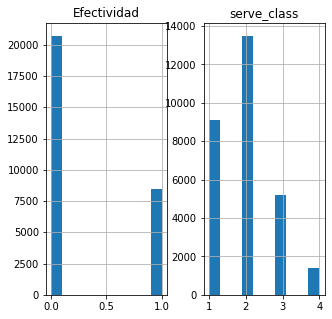

In [31]:
df[['Efectividad','serve_class']].sort_values(by='Efectividad').hist(figsize = (5,5))

In [15]:
df.describe()

,Sexo,setNumber,gameNumber,Point,pointNumber,serveNumber,shotCount,Efectividad,1º o 2º saque,serve_class,Lado(1:Iguales;0:Ventaja),DIRECCIÓN:1 abierto;2 al cuerpo;3 a la T,V (m/s),V (km/h),timeHIT,X1,Y1,Y1(ABS),Z1 (h),timeNET,TimeN-TimeH,timeBounce,TimeB-TimeH,PreVx,PreVy,PreVz,PreV,PostVx,PostVy,PostVz,PostV,Dif. V1-V2,Dif. (km/h)
count,29193.000000,29193.000000,29193.000000,29193.0,29193.000000,29193.000000,29193.000000,29193.000000,29193.000000,29193.000000,29193.000000,29193.000000,29193.000000,29193.000000,29193.000000,29193.000000,29193.000000,21615.000000,28286.000000,29193.000000,29193.000000,29193.000000,29193.000000,29193.000000,29193.000000,29193.000000,29193.000000,29193.000000,29193.000000,28665.000000,28286.000000,21615.000000,21615.000000
mean,1.259583,2.311479,6.132806,1.0,4.141746,1.000171,2.864831,0.290823,1.312609,2.228616,0.519371,2.069606,46.458242,167.249673,1.336571,-0.025645,-0.004884,1.760326,2.823742,1.627815,0.291243,1.783405,0.446834,-0.035221,0.022399,-7.833186,32.964256,-0.030041,0.014209,6.403612,24.671164,8.672808,31.222108
std,0.438413,1.183707,4.177688,0.0,2.833941,0.013086,2.453197,0.454150,0.463564,0.792284,0.499633,0.817529,6.213198,22.367512,0.905962,11.381435,1.976153,0.674445,0.171857,0.908780,0.046057,0.911209,0.071074,31.428890,7.680863,0.630473,4.674563,23.382625,5.692349,1.332627,4.286867,1.698056,6.113002
min,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,20.360000,73.296000,0.000000,-12.168000,-6.191000,0.002000,0.638000,0.212000,0.047000,0.308000,0.177000,-45.184000,-15.984000,-10.674000,6.877954,-49.672000,-27.634000,-25.036000,3.363800,-17.917227,-64.502018
25%,1.000000,1.000000,3.000000,1.0,2.000000,1.000000,1.000000,0.000000,1.000000,2.000000,0.000000,1.000000,42.040000,151.344000,0.656000,-11.387000,-1.867000,1.308000,2.725000,0.947000,0.255000,1.100000,0.395000,-31.097000,-6.954000,-8.275000,29.547628,-22.891000,-5.148000,6.119000,21.480336,7.976442,28.715192
50%,1.000000,2.000000,6.000000,1.0,4.000000,1.000000,2.000000,0.000000,1.000000,2.000000,1.000000,2.000000,46.720000,168.192000,1.011000,-10.929000,-0.098000,1.780000,2.816500,1.307000,0.285000,1.467000,0.437000,18.837000,0.179000,-7.884000,33.115124,12.051000,0.059000,6.530000,24.681019,8.603312,30.971924
75%,2.000000,3.000000,8.000000,1.0,5.000000,1.000000,4.000000,1.000000,2.000000,3.000000,1.000000,3.000000,51.290000,184.644000,2.056000,11.387000,1.869000,2.231000,2.913000,2.344000,0.319000,2.499000,0.488000,31.048000,6.978000,-7.399000,36.529200,22.815000,5.170000,6.894000,27.887294,9.268240,33.365665
max,2.000000,5.000000,46.000000,1.0,27.000000,2.000000,26.000000,1.000000,2.000000,4.000000,1.000000,3.000000,65.630000,236.268000,9.443000,12.112000,4.605000,6.191000,4.519000,9.701000,0.974000,9.853000,1.897000,46.920000,16.162000,-2.862000,49.014722,47.529000,21.311000,12.620000,51.399903,33.743996,121.478385


In [70]:
df.head(10)

,Sexo,EventID,setNumber,gameNumber,Point,pointNumber,serveNumber,startScore_Server,startScore_Receiver,shotCount,Efectividad,1º o 2º saque,serve_class,Lado(1:Iguales;0:Ventaja),DIRECCIÓN:1 abierto;2 al cuerpo;3 a la T,V (m/s),V (km/h),timeHIT,X1,Y1,Y1(ABS),Z1 (h),timeNET,TimeN-TimeH,timeBounce,TimeB-TimeH,PreVx,PreVy,PreVz,PreV,PostVx,PostVy,PostVz,PostV,Dif. V1-V2,Dif. (km/h)
0,1,DC1,1,1,1,1,1,0,0,2,1,1,3,1,2,41.47,149.292,0.441,-11.389,-2.286,2.286,3.174,0.754,0.313,0.915,0.474,29.048,8.470,-7.625,31.203651,21.263,5.684,6.380,22.915659,8.287992,29.836771
1,1,DC1,1,1,1,2,1,15,0,4,0,1,2,0,1,50.91,183.276,0.128,-11.385,0.871,0.871,2.886,0.387,0.259,0.548,0.420,33.937,-8.350,-7.607,35.767428,24.944,-5.850,6.801,26.508098,9.259331,33.333590
2,1,DC1,1,1,1,3,1,30,0,2,1,1,3,1,2,41.87,150.732,4.312,-11.387,-1.964,1.964,2.912,4.622,0.310,4.815,0.503,28.541,7.215,-7.183,30.302482,21.009,5.585,7.058,22.855758,7.446724,26.808205
3,1,DC1,1,1,1,4,1,40,0,1,1,2,1,0,1,35.22,126.792,0.449,-11.384,0.817,0.817,3.030,0.822,0.373,1.055,0.606,23.631,-3.459,-7.389,24.999723,15.163,-3.431,6.906,17.011207,7.988516,28.758658
4,1,DC1,1,2,1,1,1,0,0,4,0,1,2,1,2,39.27,141.372,0.441,-11.390,-1.088,1.088,2.904,0.773,0.332,0.945,0.504,25.859,6.024,-7.745,27.657937,18.158,2.731,6.956,19.635612,8.022325,28.880370
5,1,DC1,1,2,1,2,1,15,0,2,1,1,3,0,2,44.72,160.992,0.575,-11.380,0.551,0.551,2.943,0.866,0.291,1.052,0.477,30.104,-3.603,-7.773,31.299392,20.874,-3.323,7.384,22.389499,8.909893,32.075616
6,1,DC1,1,2,1,3,1,30,0,1,0,2,1,1,3,41.22,148.392,0.358,-11.384,-1.070,1.070,2.818,0.671,0.313,0.815,0.457,27.574,4.324,-8.249,29.104440,19.359,1.169,7.034,20.630429,8.474012,30.506441
7,1,DC1,1,2,1,4,1,30,15,2,1,1,3,0,3,44.24,159.264,0.214,-11.397,1.253,1.253,3.047,0.506,0.292,0.679,0.465,30.891,-1.727,-7.585,31.855433,22.077,-1.584,7.174,23.267343,8.588090,30.917124
8,1,DC1,1,3,1,1,1,0,0,1,0,2,1,0,3,41.64,149.904,0.530,11.395,2.643,2.643,2.776,0.853,0.323,0.996,0.466,-27.029,-7.956,-7.794,29.233734,-19.151,-4.799,7.092,20.978267,8.255468,29.719684
9,1,DC1,1,3,1,2,1,0,15,8,0,1,2,0,3,48.63,175.068,0.282,11.382,-2.679,2.679,2.748,0.550,0.268,0.678,0.396,-33.349,6.006,-7.893,34.792633,-24.558,4.684,6.605,25.858485,8.934148,32.162932


### estudio de correlaciones entre variables

In [81]:
df.corr(method='pearson').Efectividad.sort_values(ascending=False)

Efectividad                                 1.000000
serve_class                                 0.496241
PreV                                        0.196316
PostV                                       0.194242
V (m/s)                                     0.192850
V (km/h)                                    0.192850
1º o 2º saque                               0.123834
Sexo                                        0.111980
Z1 (h)                                      0.073202
setNumber                                   0.031322
Dif. (km/h)                                 0.022159
Dif. V1-V2                                  0.022159
X1                                          0.014339
Lado(1:Iguales;0:Ventaja)                   0.013065
serveNumber                                 0.008910
Y1                                          0.000038
PreVy                                      -0.000053
PostVy                                     -0.000458
gameNumber                                 -0.

<AxesSubplot:>

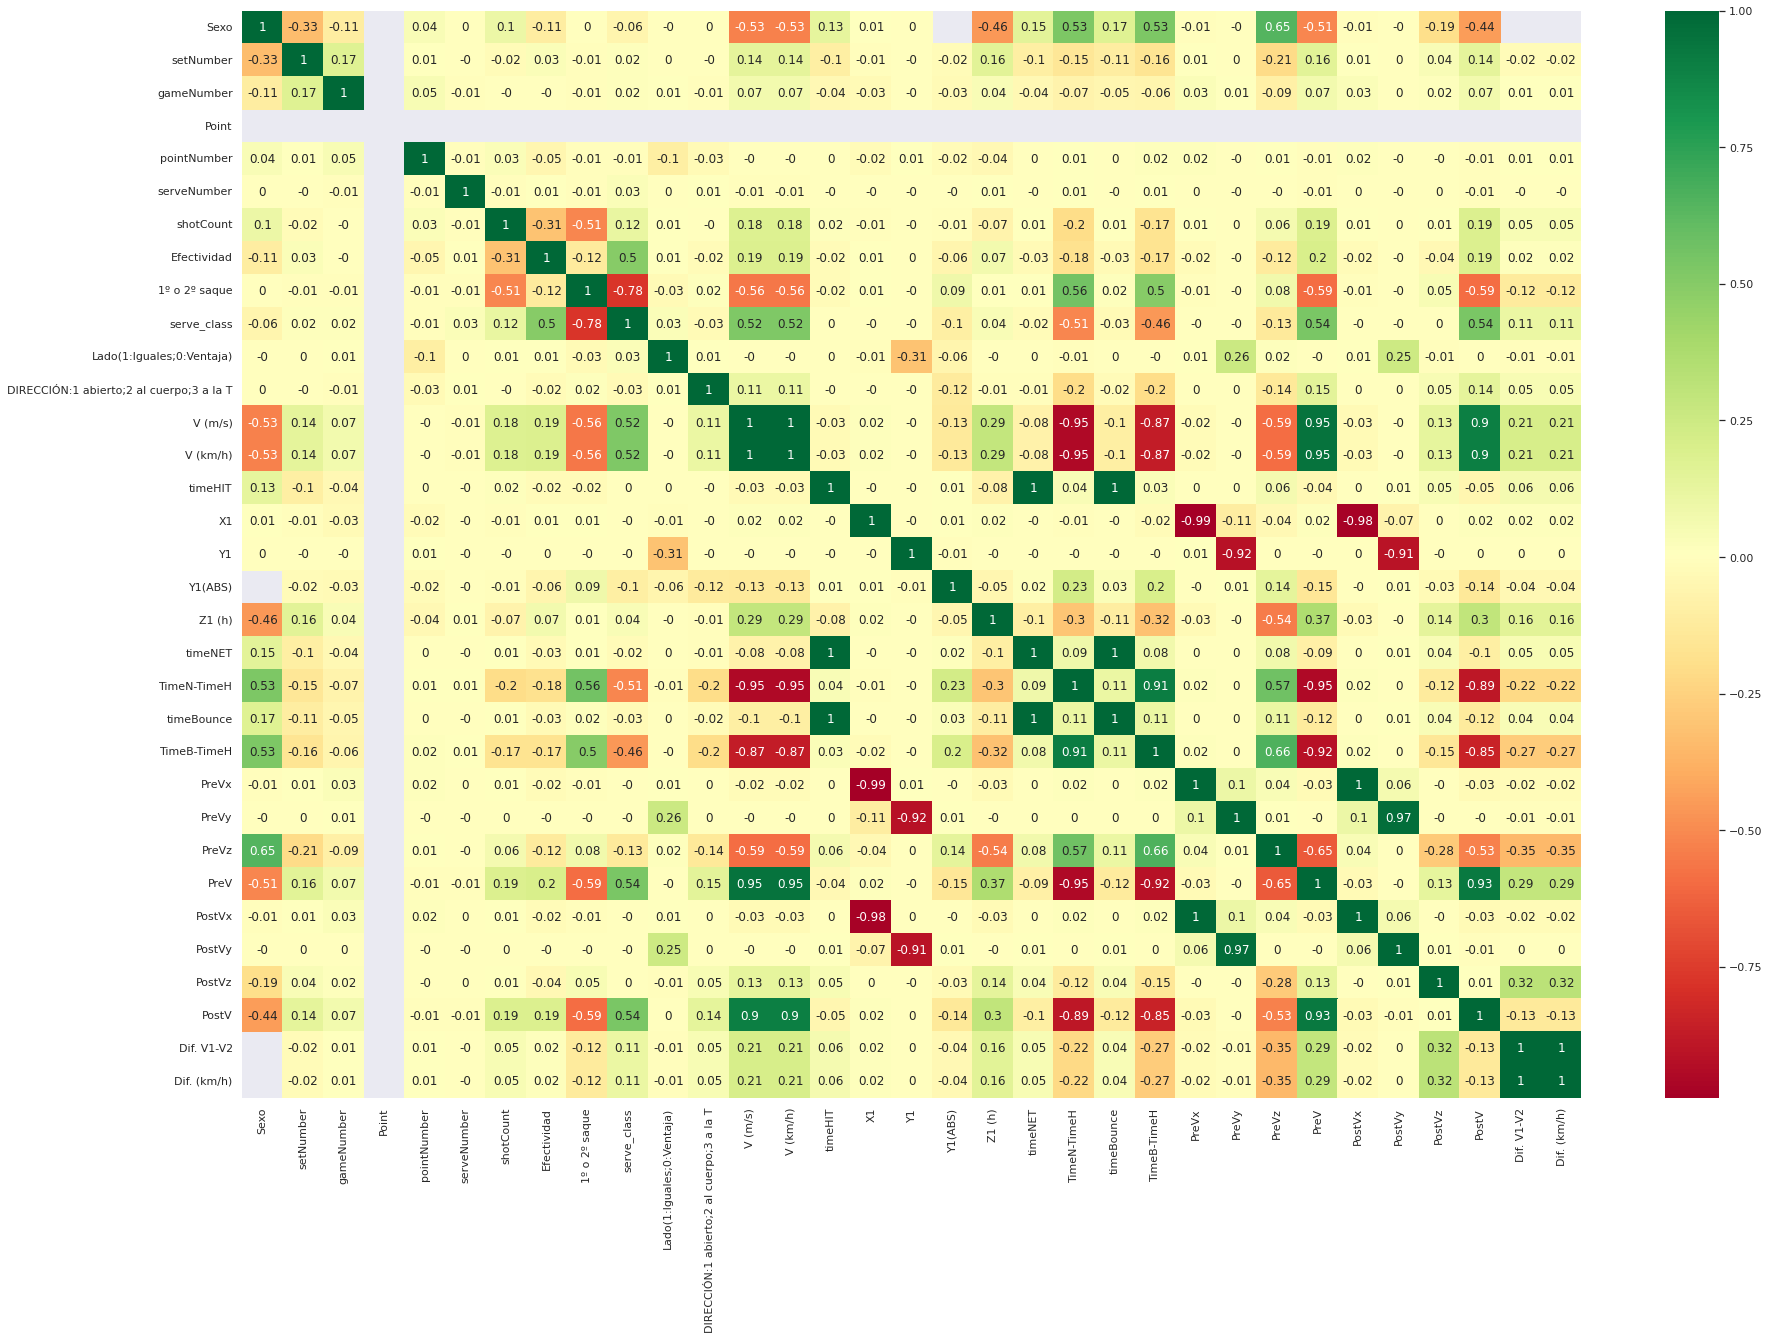

In [68]:
### Plot Correlation Matrix
sn.set(rc={"figure.figsize":(30, 20)})

sn.heatmap(df.corr().round(decimals=2), annot=True, cmap='RdYlGn') # annot=True ,

In [68]:
df.drop(columns=['Sexo', 'EventID'], inplace=True)  # just for this try

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29193 entries, 0 to 29192
Data columns (total 34 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   setNumber                                 29193 non-null  int64  
 1   gameNumber                                29193 non-null  int64  
 2   Point                                     29193 non-null  int64  
 3   pointNumber                               29193 non-null  int64  
 4   serveNumber                               29193 non-null  int64  
 5   startScore_Server                         29193 non-null  object 
 6   startScore_Receiver                       29193 non-null  object 
 7   shotCount                                 29193 non-null  int64  
 8   Efectividad                               29193 non-null  int64  
 9   1º o 2º saque                             29193 non-null  int64  
 10  serve_class                       

In [71]:
df.describe()

,setNumber,gameNumber,Point,pointNumber,serveNumber,shotCount,Efectividad,1º o 2º saque,Lado(1:Iguales;0:Ventaja),DIRECCIÓN:1 abierto;2 al cuerpo;3 a la T,...,PreVx,PreVy,PreVz,PreV,PostVx,PostVy,PostVz,PostV,Dif. V1-V2,Dif. (km/h)
count,29193.000000,29193.000000,29193.0,29193.000000,29193.000000,29193.000000,29193.000000,29193.000000,29193.000000,29193.000000,...,29193.000000,29193.000000,29193.000000,29193.000000,29193.000000,29193.000000,28665.000000,28286.000000,21615.000000,21615.000000
mean,2.311479,6.132806,1.0,4.141746,1.000171,2.864831,0.290823,1.312609,0.519371,2.069606,...,-0.035221,0.022399,-7.833186,32.964256,-0.030041,0.014209,6.403612,24.671164,8.672808,31.222108
std,1.183707,4.177688,0.0,2.833941,0.013086,2.453197,0.454150,0.463564,0.499633,0.817529,...,31.428890,7.680863,0.630473,4.674563,23.382625,5.692349,1.332627,4.286867,1.698056,6.113002
min,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,-45.184000,-15.984000,-10.674000,6.877954,-49.672000,-27.634000,-25.036000,3.363800,-17.917227,-64.502018
25%,1.000000,3.000000,1.0,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,-31.097000,-6.954000,-8.275000,29.547628,-22.891000,-5.148000,6.119000,21.480336,7.976442,28.715192
50%,2.000000,6.000000,1.0,4.000000,1.000000,2.000000,0.000000,1.000000,1.000000,2.000000,...,18.837000,0.179000,-7.884000,33.115124,12.051000,0.059000,6.530000,24.681019,8.603312,30.971924
75%,3.000000,8.000000,1.0,5.000000,1.000000,4.000000,1.000000,2.000000,1.000000,3.000000,...,31.048000,6.978000,-7.399000,36.529200,22.815000,5.170000,6.894000,27.887294,9.268240,33.365665
max,5.000000,46.000000,1.0,27.000000,2.000000,26.000000,1.000000,2.000000,1.000000,3.000000,...,46.920000,16.162000,-2.862000,49.014722,47.529000,21.311000,12.620000,51.399903,33.743996,121.478385


In [25]:
df.isnull().sum()   ### some columns have missing values

1º o 2º saque                               0
Efectividad                                 0
Lado(1:Iguales;0:Ventaja)                   0
DIRECCIÓN:1 abierto;2 al cuerpo;3 a la T    0
V(km/h)                                     0
[YA]                                        0
ZA                                          0
Znet                                        0
TIME                                        0
difV                                        0
&(deg)                                      0
ANG. IN                                     0
dLinea                                      0
dtype: int64

In [73]:
df['PostV'].describe(),    f"median: {df['PostV'].median()}"   # we checked that most of them have very similar median and mean 

(count    28286.000000
 mean        24.671164
 std          4.286867
 min          3.363800
 25%         21.480336
 50%         24.681019
 75%         27.887294
 max         51.399903
 Name: PostV, dtype: float64,
 'median: 24.68101871786127')

In [74]:
df['PostV'].median()

24.68101871786127

### Explore Data Distributions

Basic Histograms

array([[<AxesSubplot:title={'center':'1º o 2º saque'}>,
        <AxesSubplot:title={'center':'Efectividad'}>,
        <AxesSubplot:title={'center':'Lado(1:Iguales;0:Ventaja)'}>,
        <AxesSubplot:title={'center':'DIRECCIÓN:1 abierto;2 al cuerpo;3 a la T'}>],
       [<AxesSubplot:title={'center':'V(km/h)'}>,
        <AxesSubplot:title={'center':'[YA]'}>,
        <AxesSubplot:title={'center':'ZA'}>,
        <AxesSubplot:title={'center':'Znet'}>],
       [<AxesSubplot:title={'center':'TIME'}>,
        <AxesSubplot:title={'center':'difV'}>,
        <AxesSubplot:title={'center':'&(deg)'}>,
        <AxesSubplot:title={'center':'ANG. IN'}>],
       [<AxesSubplot:title={'center':'dLinea'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

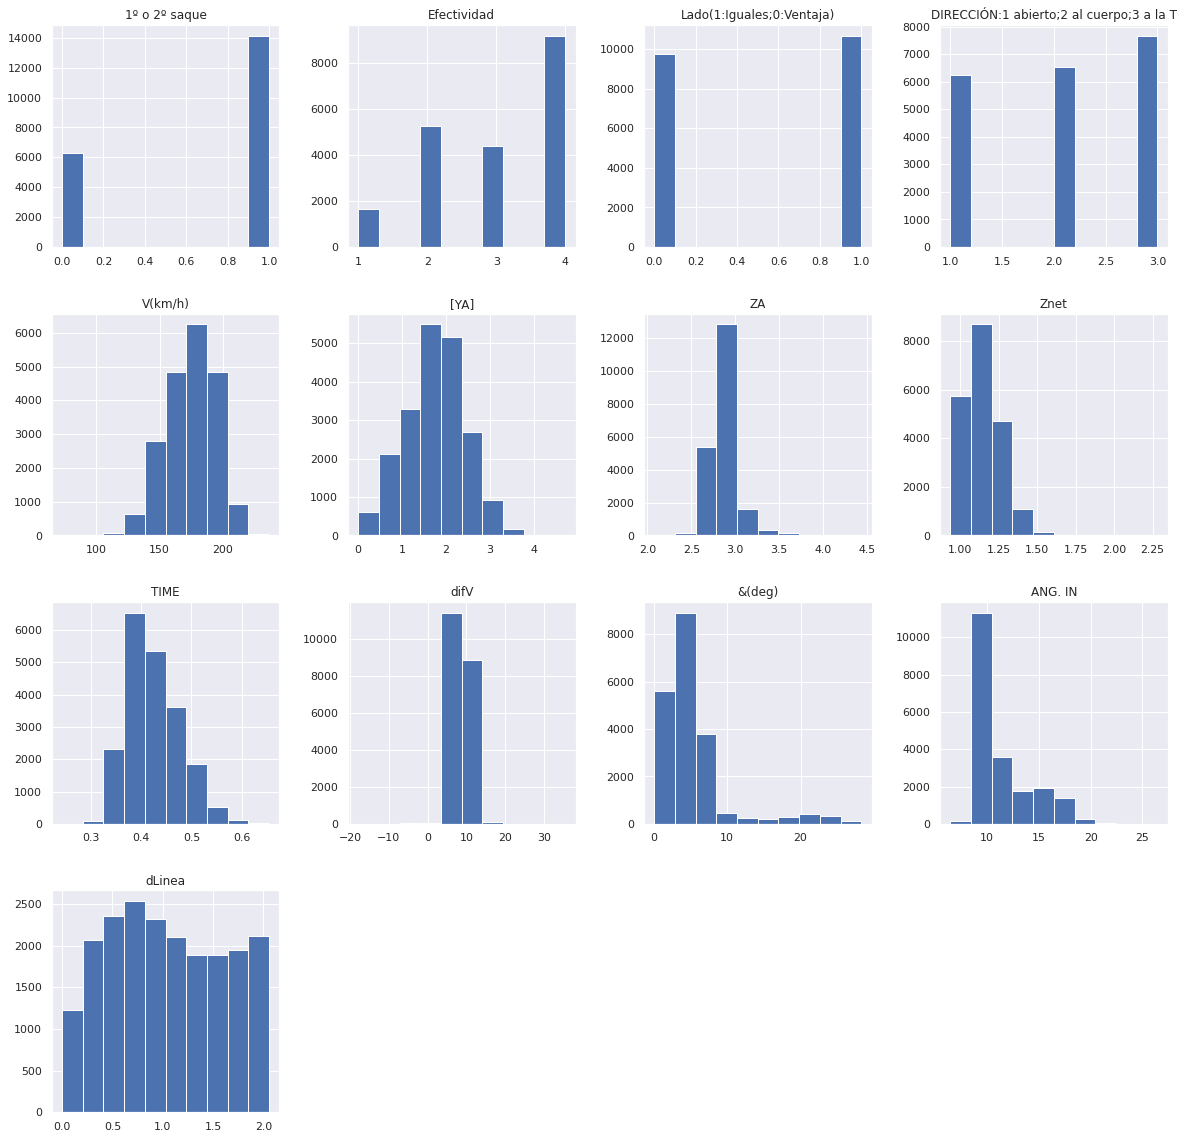

In [26]:
df.hist(figsize = (20,20))

Histograms with population density ~ probability distributions

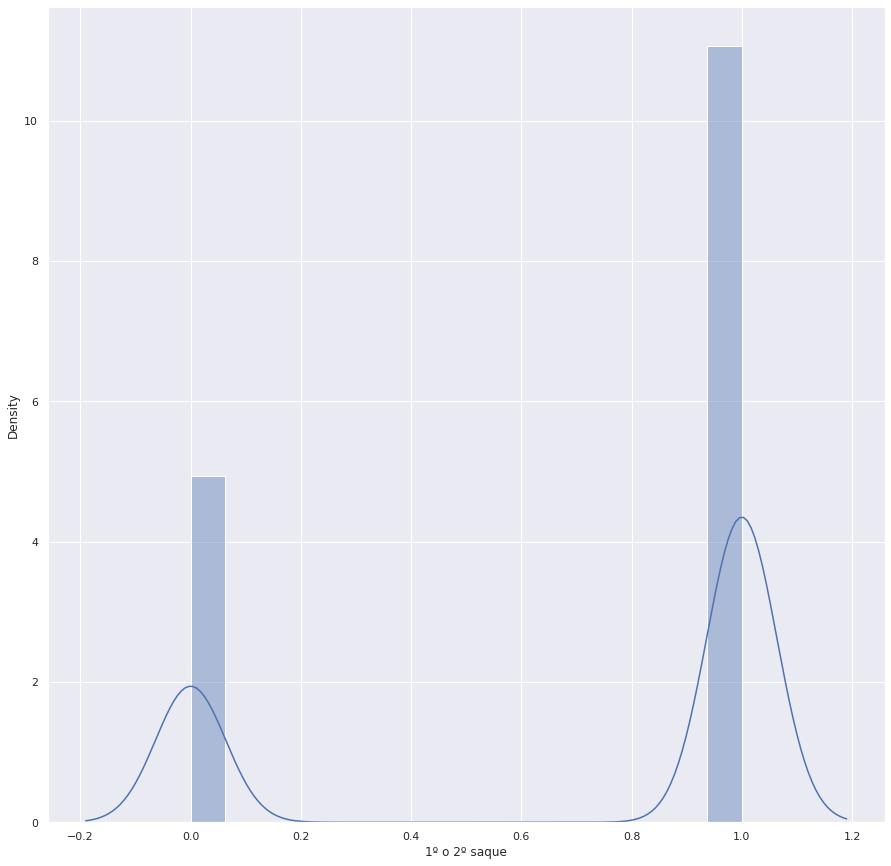

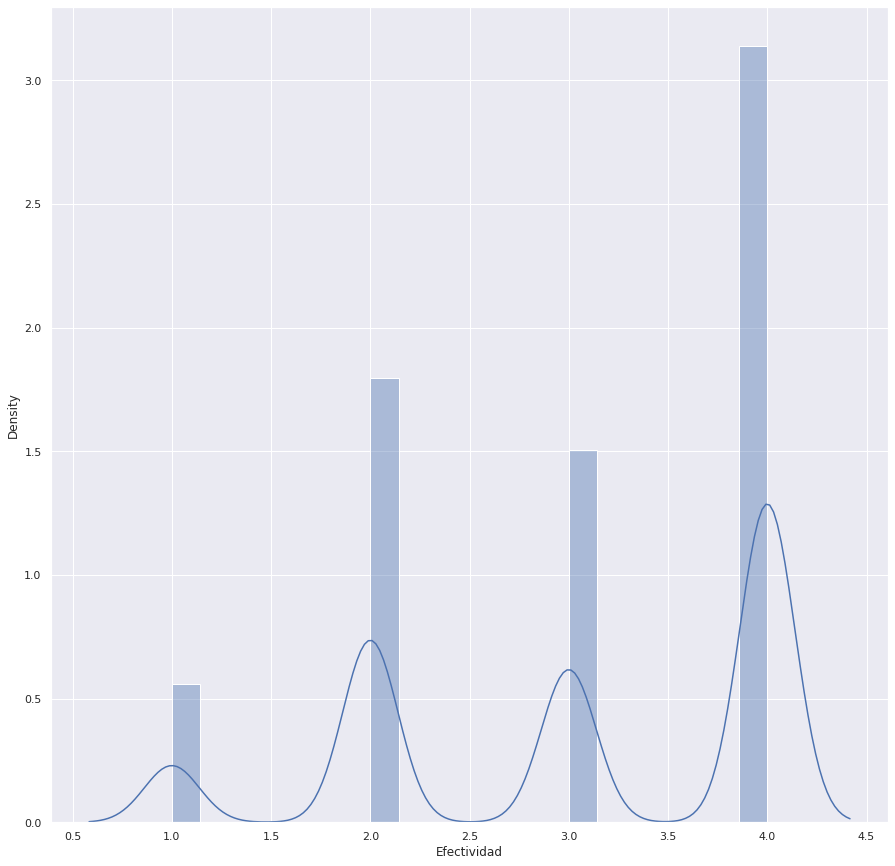

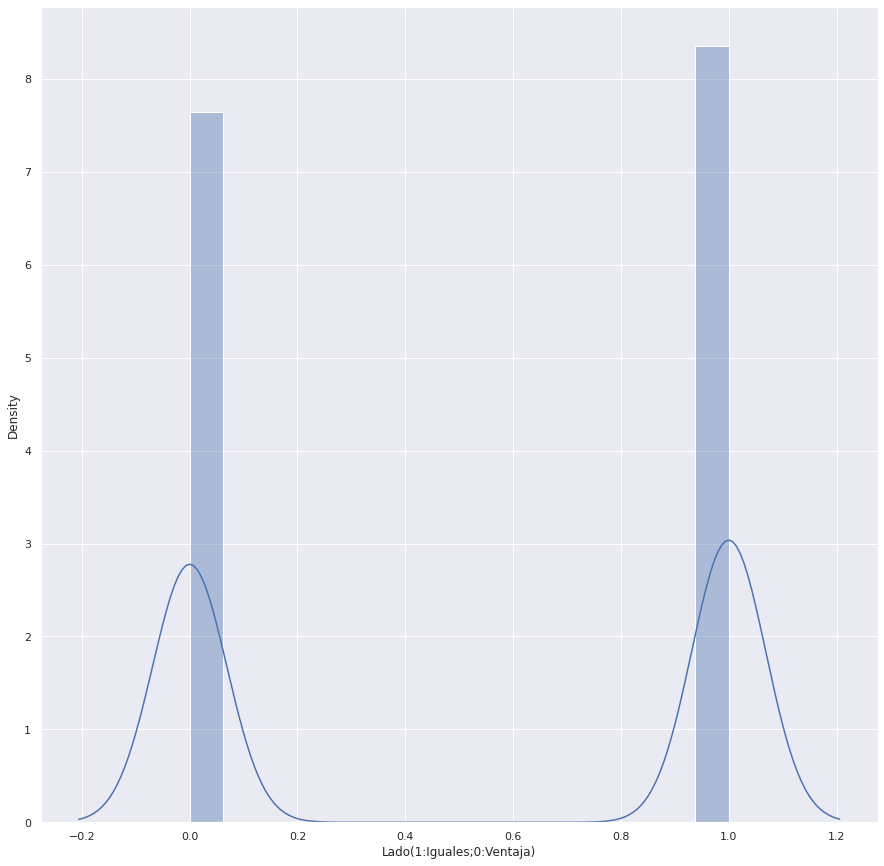

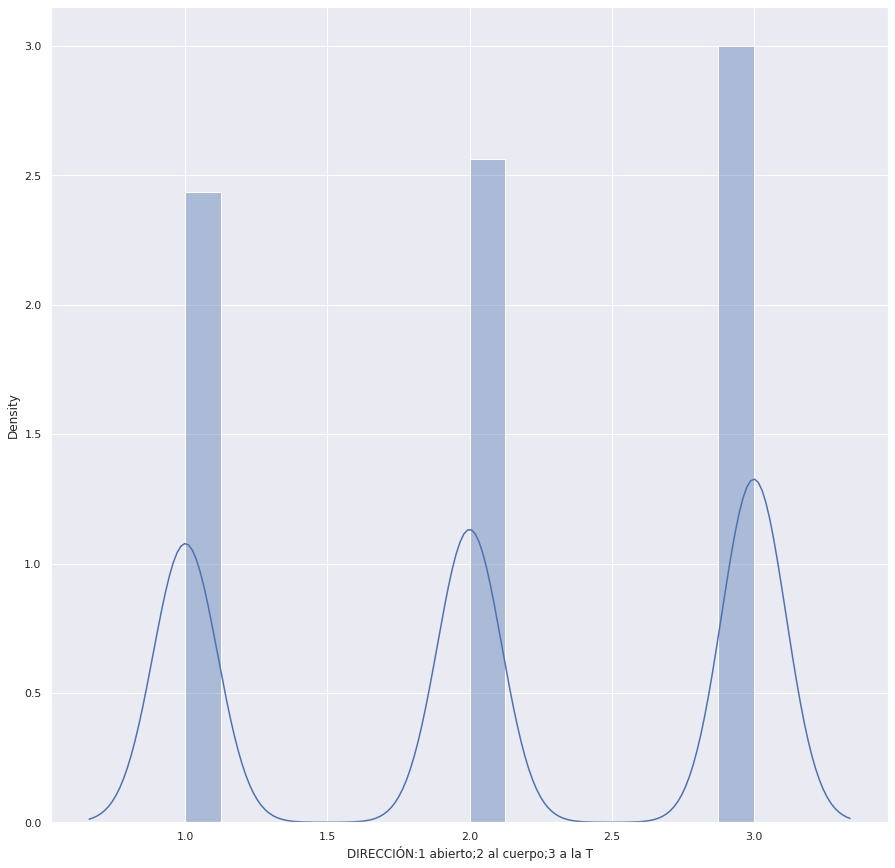

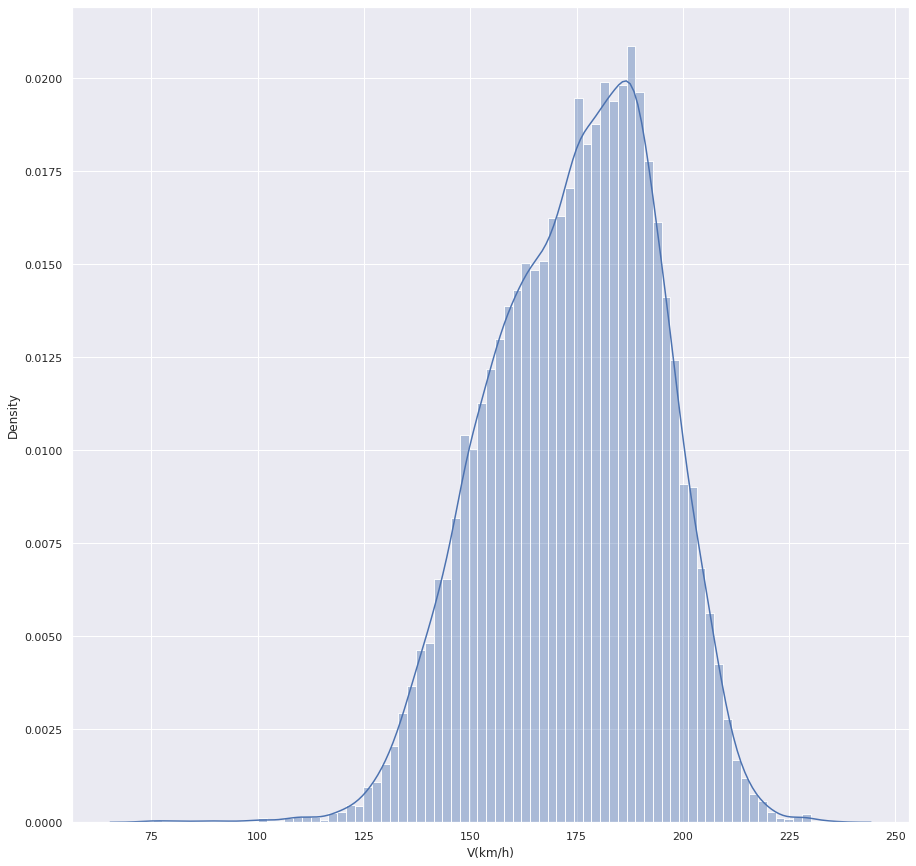

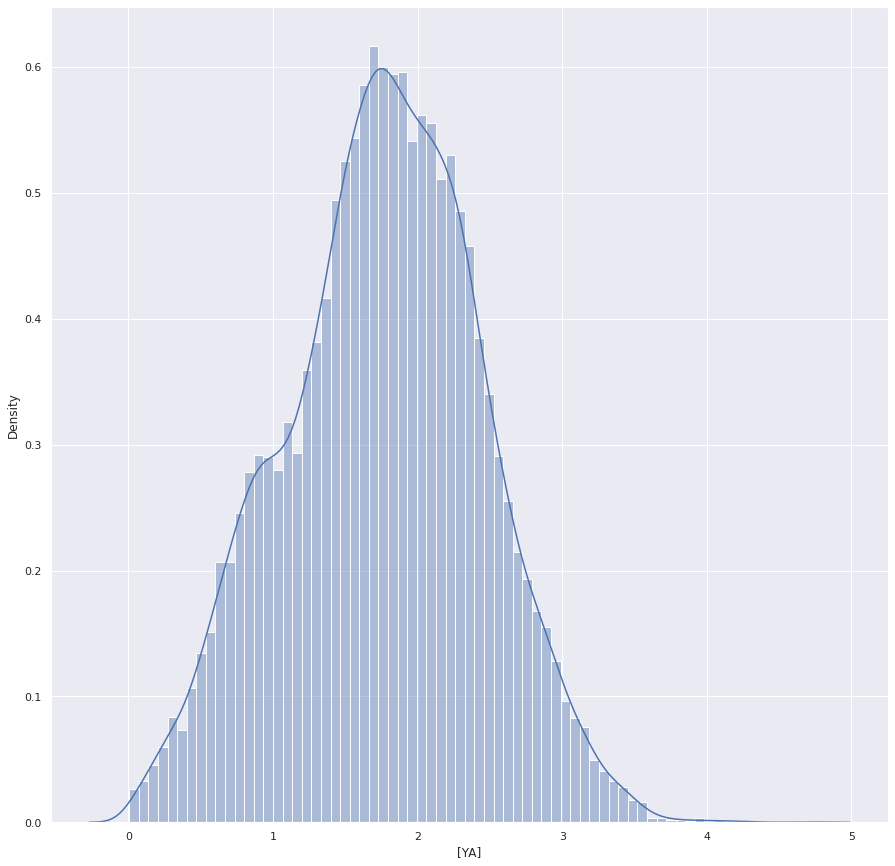

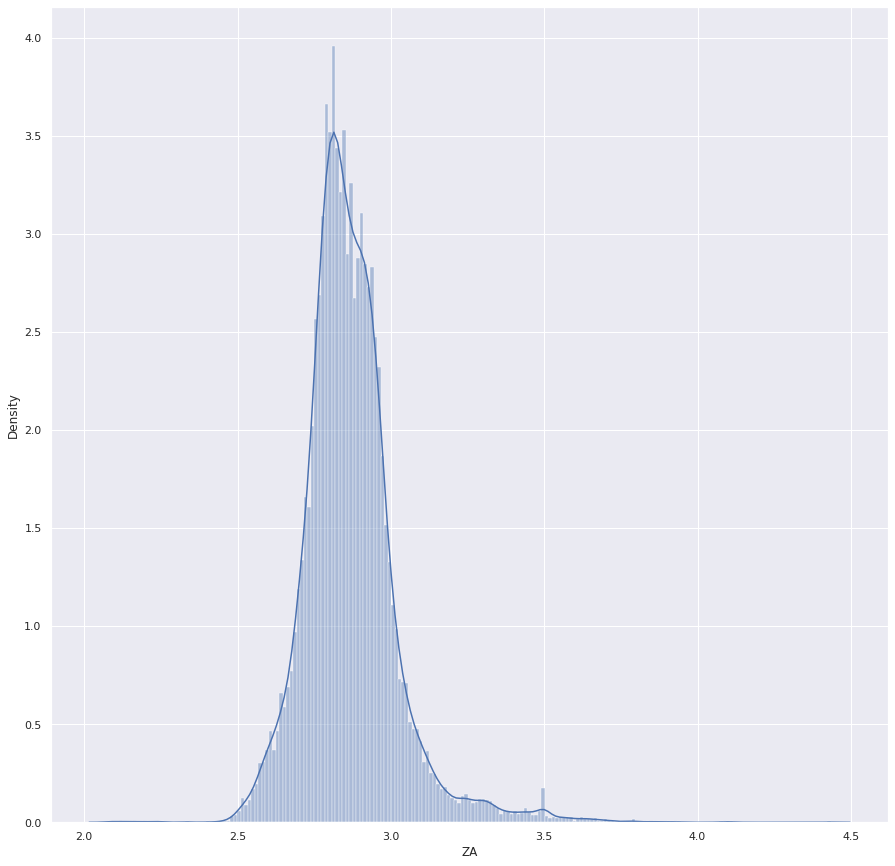

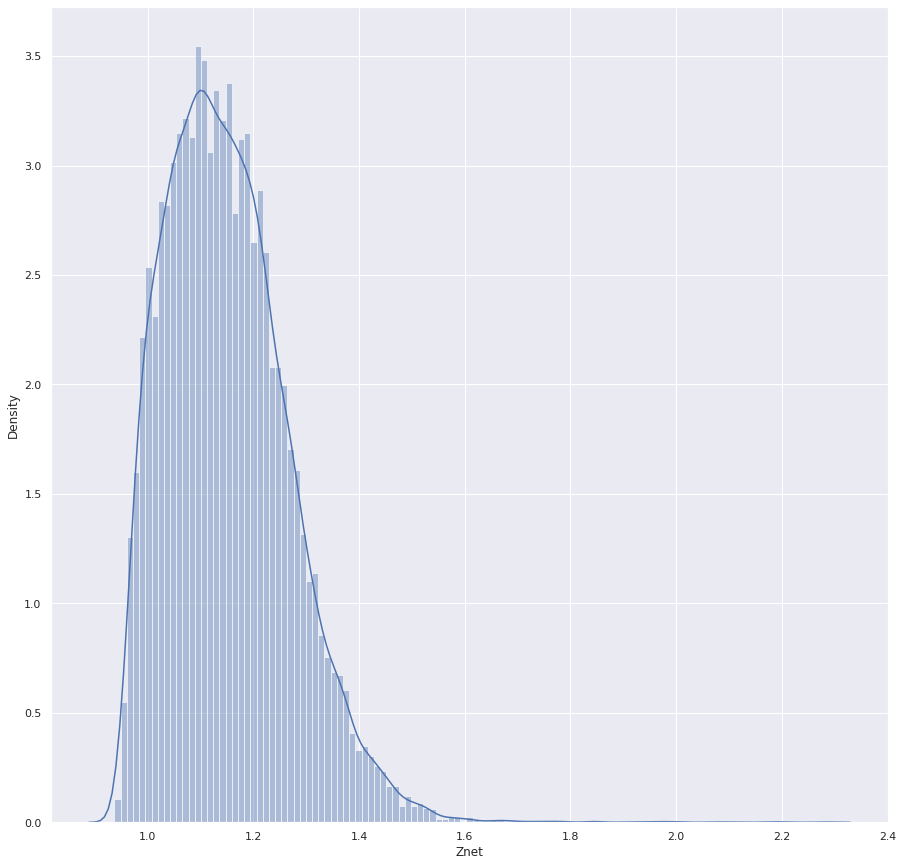

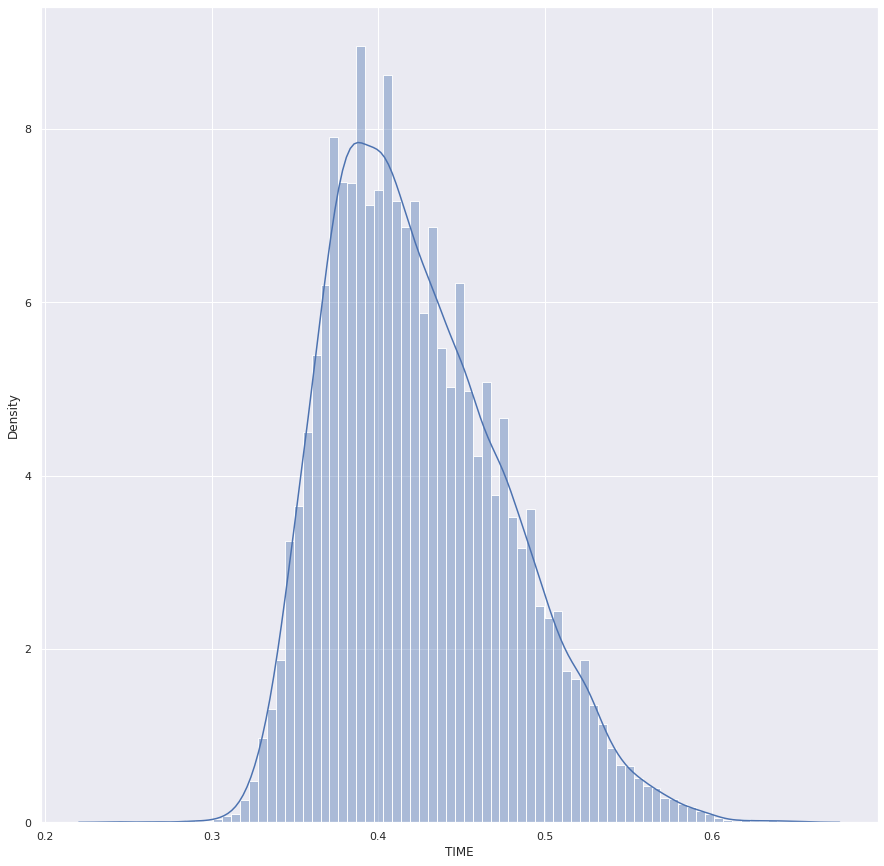

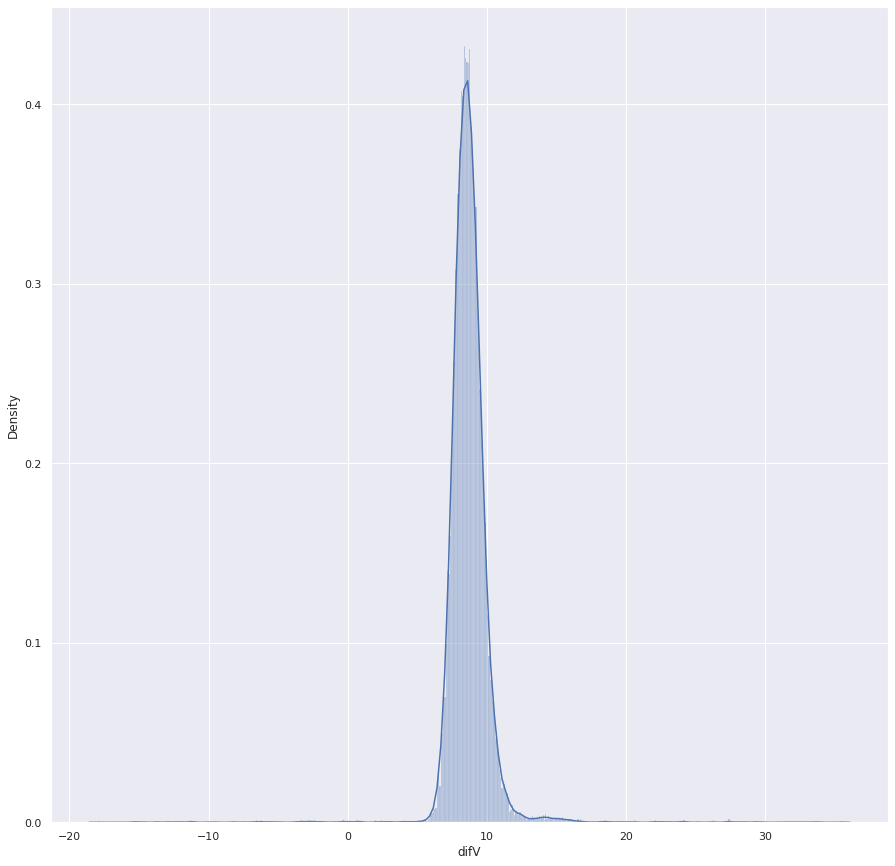

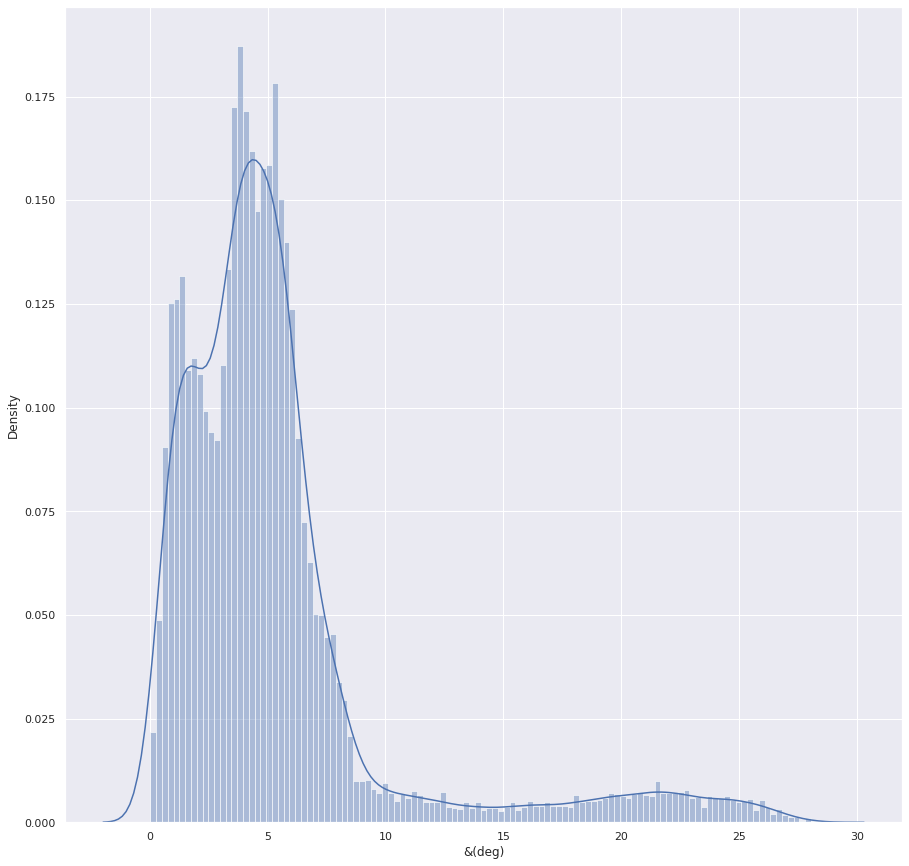

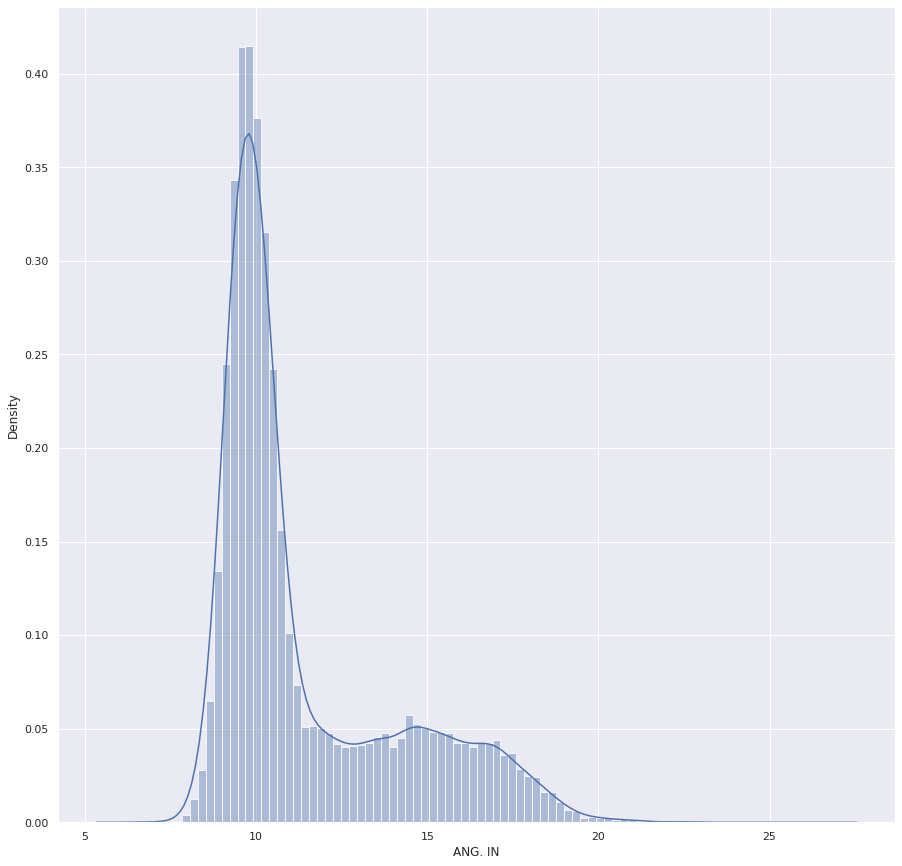

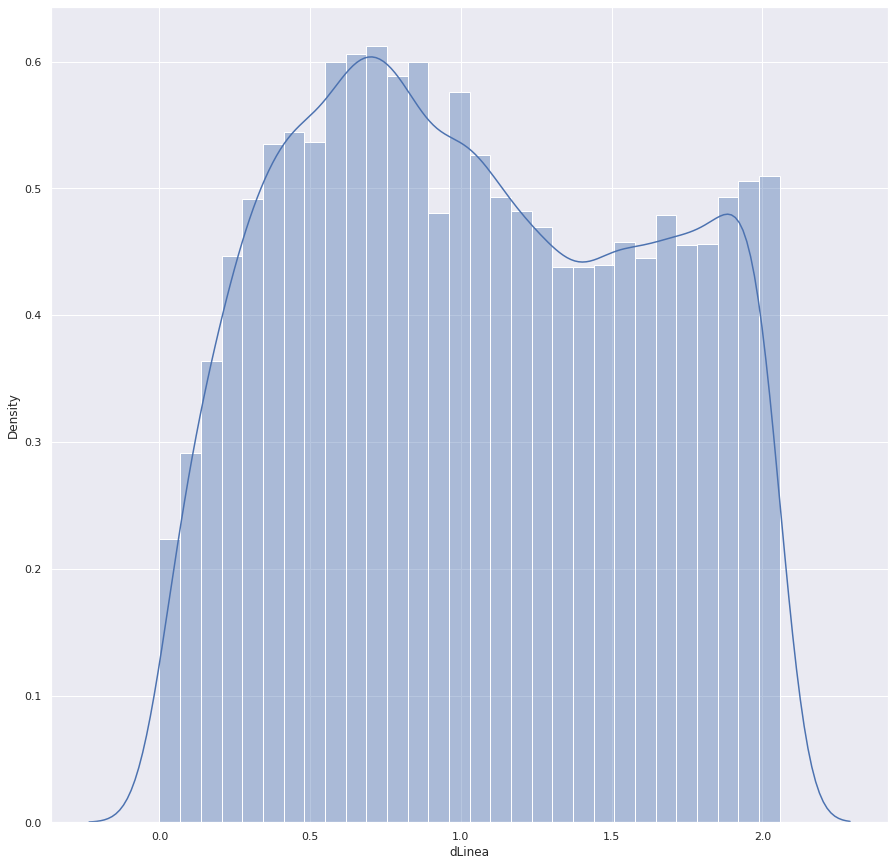

In [27]:
# df.hist(figsize = (16,18))



for c in df.columns:
    try:
        res=sn.histplot(data=df[c], stat="density", alpha=0.4, kde=True, kde_kws={"cut": 3})     
        # res = sn.distplot(df[c])
        plt.show()
    except Exception as e:
        print(f"Error in {c}   --->   ", e)


## Some conclusions:
1. We have discrete and continuous variables
2. Continuous vars doesn't always seem to follow a normal distribution
3. We will have to do some feature engineering. These processes might vary depending on the type of algorithm we need to use later
4. Pensaba que el dataset consistía en secuencias, pero me parece que aquí sólo veo servicios (?) Dependiendo de si es un dataset secuencial o no podremos utilizar unos u otros algoritmos

### OUTLIERS

#### boxplots:
The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of box to show the range of the data. By default, they extend no more than 1.5 * IQR (IQR = Q3 - Q1) from the edges of the box, ending at the farthest data point within that interval. Outliers are plotted as separate dots.

En resumen, los puntos sueltos son normalmente outliers, con lo que pueden ser removidos (salvo que necesitemos tenerlos en cuenta, por aportar información)

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html

<AxesSubplot:>

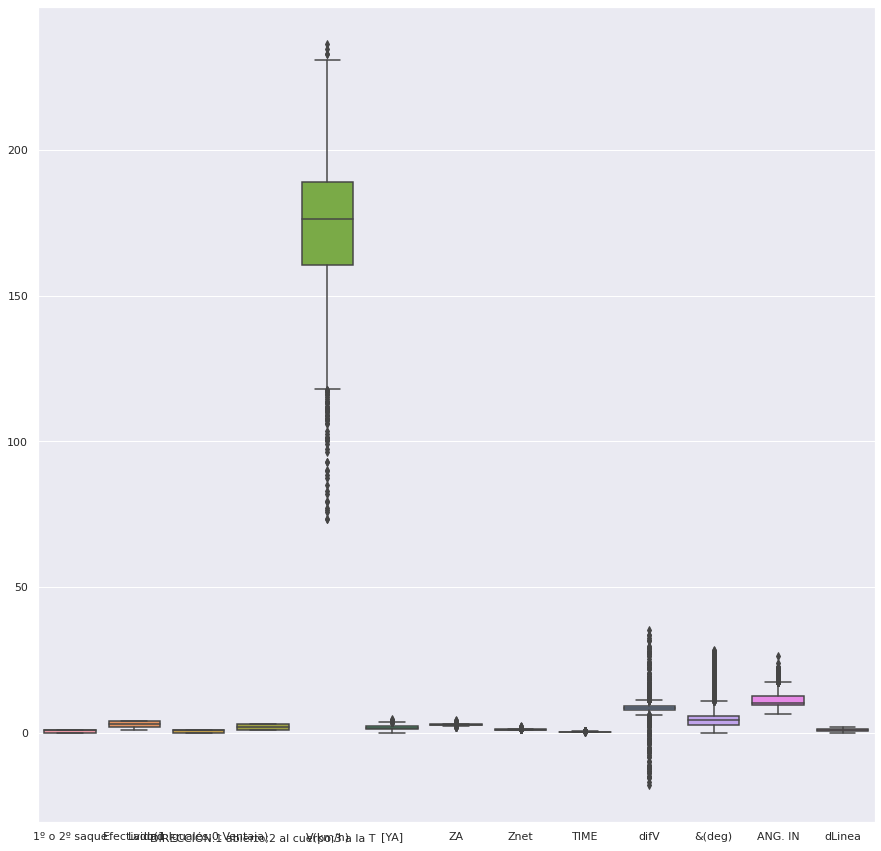

In [28]:
sn.boxplot(data=df)

Efectividad                                 1.000000  
PreV                                        0.196316  
PostV                                       0.194242  
V (m/s)                                     0.192850  
V (km/h)                                    0.192850  
Z1 (h)                                      0.073202  
setNumber                                   0.031322  
Dif. (km/h)                                 0.022159  
Dif. V1-V2                                  0.022159  
X1                                          0.014339  
Lado(1:Iguales;0:Ventaja)                   0.013065  
serveNumber                                 0.008910  
Y1                                          0.000038  

In [8]:
j = ["Efectividad","PreV", "PostV","V (m/s)","V (km/h)","Z1 (h)","setNumber","Dif. (km/h)","Dif. V1-V2","X1","Lado(1:Iguales;0:Ventaja)","serveNumber","Y1"]
j

['Efectividad',
 'PreV',
 'PostV',
 'V (m/s)',
 'V (km/h)',
 'Z1 (h)',
 'setNumber',
 'Dif. (km/h)',
 'Dif. V1-V2',
 'X1',
 'Lado(1:Iguales;0:Ventaja)',
 'serveNumber',
 'Y1']

**From histograms, correlation matriz (and common sense):**  
- V(m/s) & V(km/h)  provide redundant information --> their population distribution is identical --> pick one.
- The same happens with  'Dif. (km/h)'&  'Dif. V1-V2' --> pick one
- Absolute time doesn't work as a variable unless we transform it into a feature (i.e., a variable) with relative euclidean distance to something. i.e, all times can be added as V (e/t) --> more variables 
providing same info won't help a prediction model 
- 'Point': always the same value --> not info at all --> delete
- Note that some features should be correlated with efectiveness  (ServeClass, 1er, 2º saque), but they are not in a preliminary stats, test ... think about rescaling or resampling and run some correlations again   --> AFTER CONVERTING TO DUMMIES THEY SHOWED GREAT CORRELATION ... WE WILL HAVE TO RUN HOT ENCODING FOR ALL BEFORE BEING SURE OF CORRELATIONS!

**Final Features:**

Y = 'Efectividad'  
X = ['PreV', 'PostV',  'V (m/s)', 'Z1 (h)', 'setNumber', 'Dif. V1-V2', 'X1', 'Lado(1:Iguales;0:Ventaja)', 'serveNumber', 'Y1']

In [23]:
y = 'Efectividad'  
x = ['PreV', 'PostV',  'V (m/s)', 'Z1 (h)', 'setNumber', 'Dif. V1-V2', 'X1', 'Lado(1:Iguales;0:Ventaja)', 'serveNumber', 'Y1']

In [24]:
Y = df[y]
X = df[x]


0        1
1        0
2        1
3        1
4        0
        ..
29188    0
29189    0
29190    0
29191    0
29192    0
Name: Efectividad, Length: 29193, dtype: int64

In [25]:
X  # NOT DEFINITIVE!!!!   CHECK CORRELATIONS AFTER ONE HOT ENCODING OR ORDINAL ENCODING!

,PreV,PostV,V (m/s),Z1 (h),setNumber,Dif. V1-V2,X1,Lado(1:Iguales;0:Ventaja),serveNumber,Y1
0,31.203651,22.915659,41.47,3.174,1,8.287992,-11.389,1,1,-2.286
1,35.767428,26.508098,50.91,2.886,1,9.259331,-11.385,0,1,0.871
2,30.302482,22.855758,41.87,2.912,1,7.446724,-11.387,1,1,-1.964
3,24.999723,17.011207,35.22,3.030,1,7.988516,-11.384,0,1,0.817
4,27.657937,19.635612,39.27,2.904,1,8.022325,-11.390,1,1,-1.088
...,...,...,...,...,...,...,...,...,...,...
29188,33.999023,24.745571,47.45,2.719,3,9.253452,11.385,1,1,1.007
29189,29.762144,20.806156,41.82,2.703,3,8.955988,11.379,0,1,1.427
29190,27.476137,19.836132,38.41,2.956,3,7.640005,11.385,0,1,-2.411
29191,31.018599,22.535194,44.69,2.729,3,8.483405,11.388,0,1,1.232


#### Lessons learnt:  
- use df_3, not the top correlated df  
- using V vs Efectividad gives almos tthe same results!  
- Try all algorithms with all 3 X options!!  
    - V vs Efectividad
    - df_3 vs Efectividad
    - Max_correlated_vars_df vs Efectividad